In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Step 1: Load the dataset
# Load the loan data
file_path = '/content/drive/MyDrive/PGP-MLC66/Lending club case study /loan.csv'
loan_data = pd.read_csv(file_path)

# Display initial information about the dataset
print("Initial Dataset Overview")
loan_data.info()
print(loan_data.head())

# Markdown: ## Data Overview
# The dataset contains 39,717 entries and 111 columns, consisting of both numerical and categorical data.
# Before performing any analysis, we need to identify and handle missing values to ensure data quality.

# Step 2: Identify and Handle Missing Values
# Identify columns with missing values
missing_values = loan_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("\nColumns with Missing Values:")
print(missing_values)

# Markdown: ## Handling Missing Values
# Let's analyze the columns with missing values and decide on the treatment method.
# Columns with 100% missing values or very high missing values will be dropped.
# For columns with fewer missing values, we will consider imputing them using the median or mode, depending on whether the column is numerical or categorical.

# Drop columns with all missing values or very high missing values (more than 90%)
columns_to_drop = missing_values[missing_values > 0.9 * len(loan_data)].index
loan_data_cleaned = loan_data.drop(columns=columns_to_drop)

print("\nColumns Dropped Due to High Missing Values:")
print(columns_to_drop)

# Now, check for the remaining missing values
remaining_missing_values = loan_data_cleaned.isnull().sum()
remaining_missing_values = remaining_missing_values[remaining_missing_values > 0].sort_values(ascending=False)

print("\nRemaining Missing Values After Dropping High Missing Value Columns:")
print(remaining_missing_values)

# Markdown: ## Explanation of Column Dropping
# We dropped columns where more than 90% of the data was missing because imputing these values would introduce too much bias or noise.
# These columns likely don't provide useful information due to the lack of data, so it's better to remove them from the analysis.

# Handle remaining missing values
# 'revol_util' is a numerical percentage column; we impute missing values with the median.
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].str.rstrip('%').astype('float')
loan_data_cleaned['revol_util'].fillna(loan_data_cleaned['revol_util'].median(), inplace=True)

# 'tax_liens' is a numerical column with only a few missing values; we impute with the median.
loan_data_cleaned['tax_liens'].fillna(loan_data_cleaned['tax_liens'].median(), inplace=True)

# 'title' is a categorical column; we impute missing values with the mode (most frequent value).
loan_data_cleaned['title'].fillna(loan_data_cleaned['title'].mode()[0], inplace=True)

# 'emp_title' and 'emp_length' are categorical columns with missing values; we impute with the mode.
loan_data_cleaned['emp_title'].fillna(loan_data_cleaned['emp_title'].mode()[0], inplace=True)
loan_data_cleaned['emp_length'].fillna(loan_data_cleaned['emp_length'].mode()[0], inplace=True)

# 'mths_since_last_delinq' is numerical column; we impute with the median.
loan_data_cleaned['mths_since_last_delinq'].fillna(loan_data_cleaned['mths_since_last_delinq'].median(), inplace=True)


# 'last_pymnt_d' and 'last_credit_pull_d' are date columns; we impute with the mode.
loan_data_cleaned['last_pymnt_d'].fillna(loan_data_cleaned['last_pymnt_d'].mode()[0], inplace=True)
loan_data_cleaned['last_credit_pull_d'].fillna(loan_data_cleaned['last_credit_pull_d'].mode()[0], inplace=True)

# 'collections_12_mths_ex_med' and 'chargeoff_within_12_mths' are numerical columns; we impute with the median.
loan_data_cleaned['collections_12_mths_ex_med'].fillna(loan_data_cleaned['collections_12_mths_ex_med'].median(), inplace=True)
loan_data_cleaned['chargeoff_within_12_mths'].fillna(loan_data_cleaned['chargeoff_within_12_mths'].median(), inplace=True)

# 'pub_rec_bankruptcies' is a numerical column; we impute with the median.
loan_data_cleaned['pub_rec_bankruptcies'].fillna(loan_data_cleaned['pub_rec_bankruptcies'].median(), inplace=True)

# Final check for any remaining missing values
remaining_missing_values_after_imputation = loan_data_cleaned.isnull().sum().sum()

print("\nRemaining Missing Values After Imputation:")
print(remaining_missing_values_after_imputation)

# Markdown: ## Explanation of Imputation
# - 'revol_util': Imputed with the median because it's a numerical column representing percentages.
# - 'tax_liens', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies': Imputed with the median as they are numerical columns with only a few missing values.
# - 'title', 'emp_title', 'emp_length', 'last_pymnt_d', 'last_credit_pull_d': Imputed with the mode as they are categorical columns.
# - 'mths_since_last_delinq', 'mths_since_last_record': These columns are important for assessing the borrower's delinquency history. Therefore, they are imputed with the median to retain their numerical distribution.
# These imputations ensure that the dataset is complete and ready for analysis without introducing significant bias.

# At this point, there should be no remaining missing values, and the dataset is ready for further analysis.

<ipython-input-1-e41201e5b29b>:12: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path)


Initial Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  

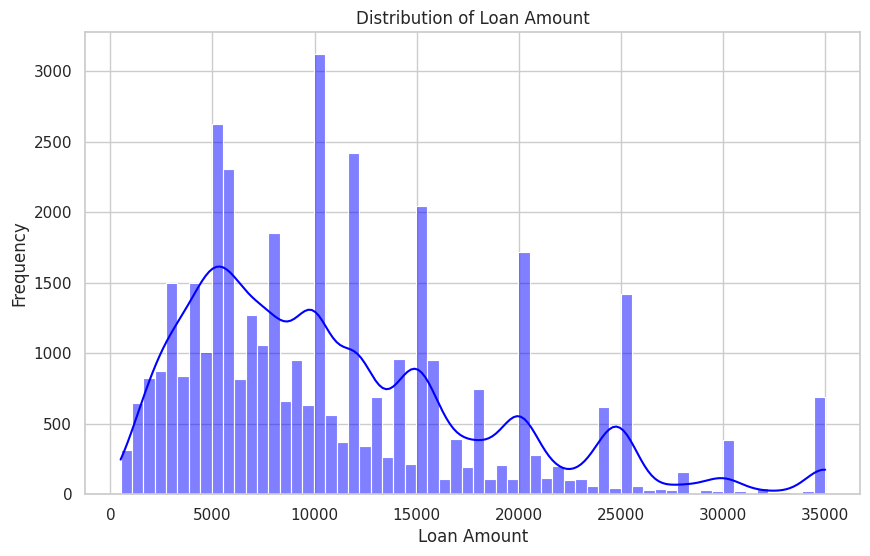

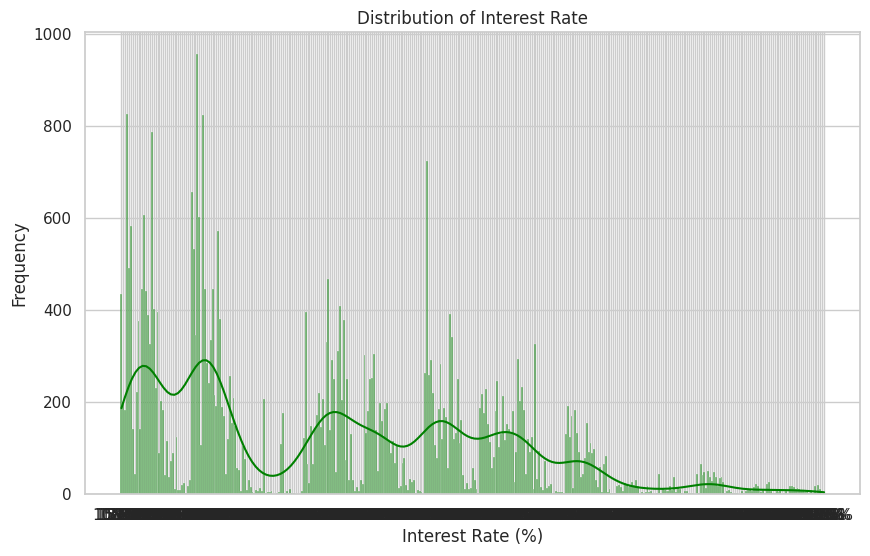

<ipython-input-2-b3e5dbeb83d3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=loan_data_cleaned, palette='Set2')


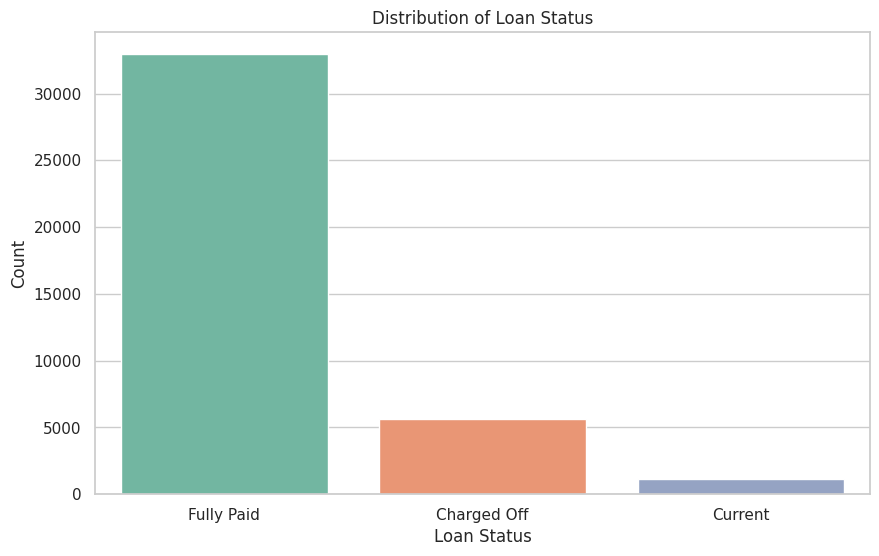

In [2]:
# Step 3: Original Univariate Analysis
# Analyze the distribution of loan amount
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['loan_amnt'], kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Analyze the distribution of interest rates
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['int_rate'], kde=True, color='green')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Analyze the distribution of loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=loan_data_cleaned, palette='Set2')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Markdown: ## Univariate Analysis
# **Loan Amount**: Most loans are within the $5,000 to $15,000 range, with fewer high-value loans.
# **Interest Rate**: Interest rates are generally between 10% and 15%, with a peak around 13%. Higher interest rates may indicate higher-risk borrowers.
# **Loan Status**: The majority of loans are either fully paid or current, with a smaller but significant number of charged-off (defaulted) loans.
# These distributions provide a solid foundation for understanding the dataset before diving deeper into more complex relationships.


<ipython-input-3-e5d18e099aab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_cleaned, palette='Set3')


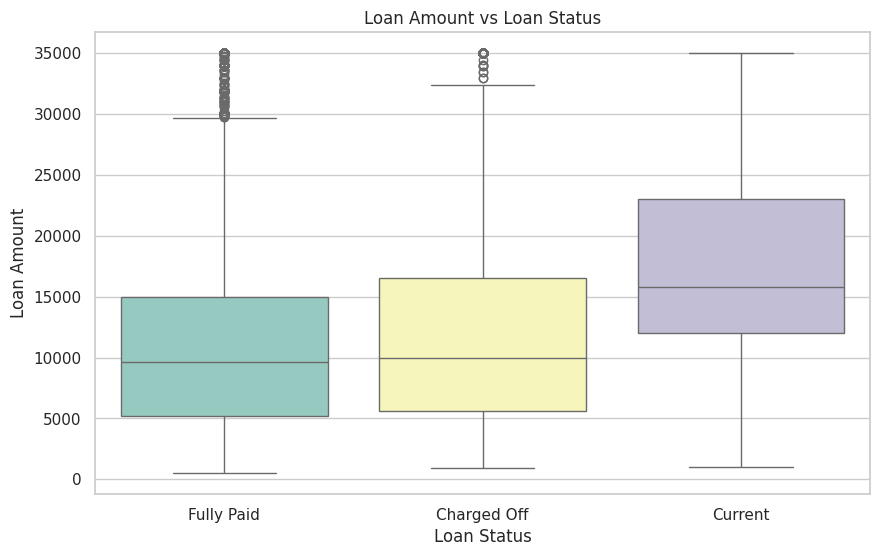

<ipython-input-3-e5d18e099aab>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='int_rate', data=loan_data_cleaned, palette='Set3')


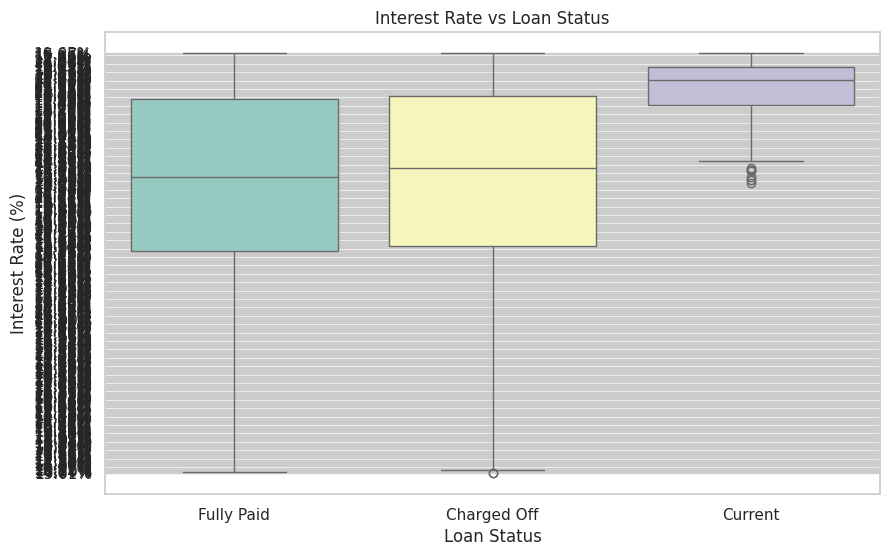

<ipython-input-3-e5d18e099aab>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='annual_inc', data=loan_data_cleaned, palette='Set3')


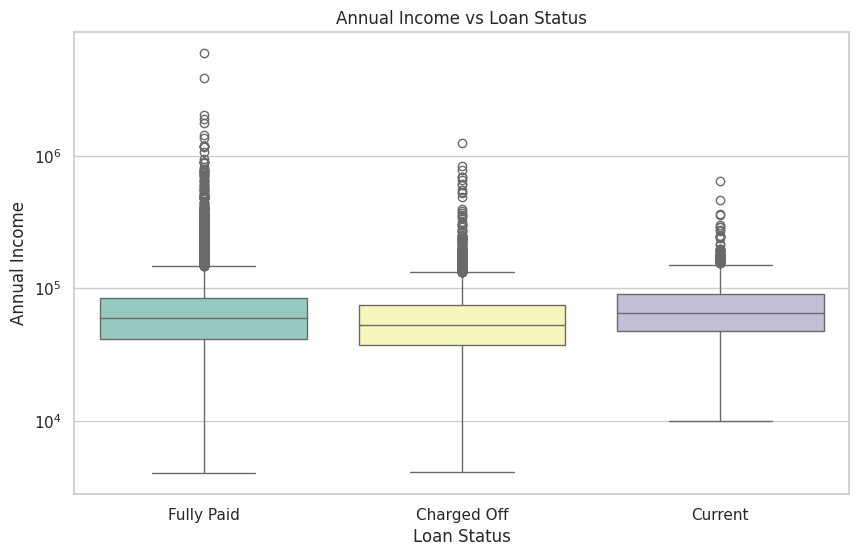

In [3]:
# Step 4: Original Bivariate Analysis
# Analyze the relationship between loan amount and loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_cleaned, palette='Set3')
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

# Analyze the relationship between interest rate and loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_cleaned, palette='Set3')
plt.title('Interest Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()

# Analyze the relationship between annual income and loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data_cleaned, palette='Set3')
plt.title('Annual Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.yscale('log')  # Use log scale due to the wide range of incomes
plt.show()

# Markdown: ## Bivariate Analysis
# **Loan Amount vs Loan Status**: Higher loan amounts tend to have a higher risk of being charged off (defaulted).
# **Interest Rate vs Loan Status**: Charged-off loans generally have higher interest rates, indicating that higher-risk borrowers are charged more.
# **Annual Income vs Loan Status**: There is a wide range of incomes across all loan statuses, but defaults do not show a clear pattern with income.
# These insights suggest that loan amount and interest rate are important factors in determining loan outcomes.


In [10]:
# Step 5: Derived Metrics
# Derive Credit Utilization Ratio
# Handle cases where 'revol_util' might be zero to avoid infinite values

loan_data_cleaned['credit_utilization'] = loan_data_cleaned['revol_bal'] / loan_data_cleaned['revol_util'].replace(0, pd.NA)
loan_data_cleaned['credit_utilization'].fillna(0, inplace=True)

# Cap Credit Utilization Ratio at 1 (100%) for better visualization
loan_data_cleaned['credit_utilization'] = loan_data_cleaned['credit_utilization'].apply(lambda x: min(x, 1))

print("\nDerived Metrics after handling extremes:")
print(loan_data_cleaned[['dti', 'credit_utilization', 'loan_to_income']].describe())

# Derive Loan-to-Income Ratio
loan_data_cleaned['loan_to_income'] = loan_data_cleaned['loan_amnt'] / loan_data_cleaned['annual_inc']

print("\nDerived Metrics:")
print(loan_data_cleaned[['dti', 'credit_utilization', 'loan_to_income']].describe())

# Markdown: ## Derived Metrics
# We derived the following metrics to gain deeper insights:
# - **Debt-to-Income Ratio (DTI)**: Represents the proportion of annual income that goes towards debt payments.
# - **Credit Utilization Ratio**: Indicates the proportion of the revolving credit that is being used by the borrower.
# - **Loan-to-Income Ratio**: Compares the loan amount to the borrower's annual income.
# These metrics provide a more comprehensive view of the borrower's financial health and potential risk.



Derived Metrics after handling extremes:
                dti  credit_utilization  loan_to_income
count  39717.000000        39717.000000    39717.000000
mean      13.315130            0.972178        0.187914
std        6.678594            0.164464        0.116370
min        0.000000            0.000000        0.000789
25%        8.170000            1.000000        0.100000
50%       13.400000            1.000000        0.166102
75%       18.600000            1.000000        0.251311
max       29.990000            1.000000        0.830000

Derived Metrics:
                dti  credit_utilization  loan_to_income
count  39717.000000        39717.000000    39717.000000
mean      13.315130            0.972178        0.187914
std        6.678594            0.164464        0.116370
min        0.000000            0.000000        0.000789
25%        8.170000            1.000000        0.100000
50%       13.400000            1.000000        0.166102
75%       18.600000            1.000000     

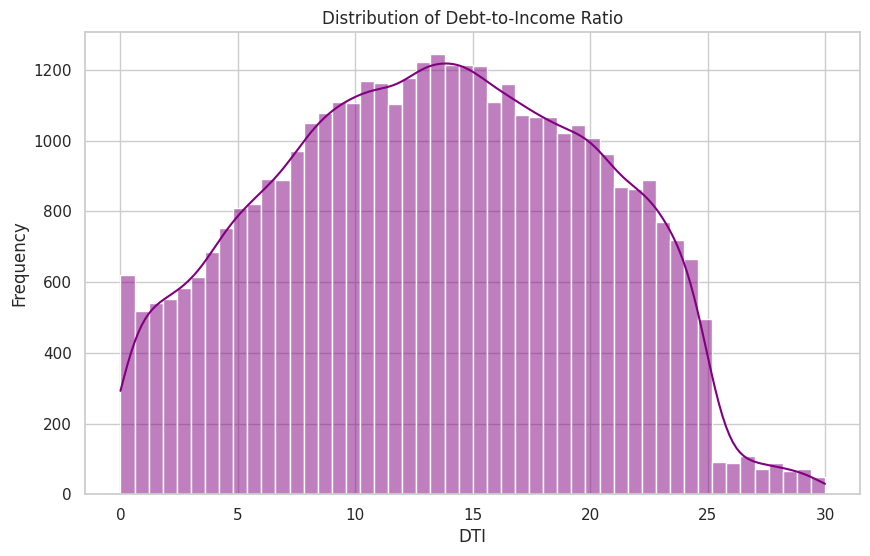

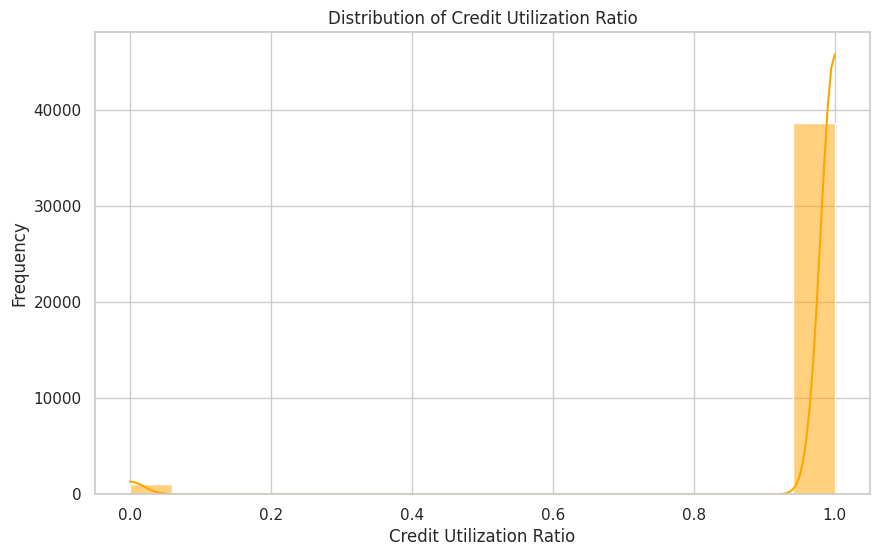

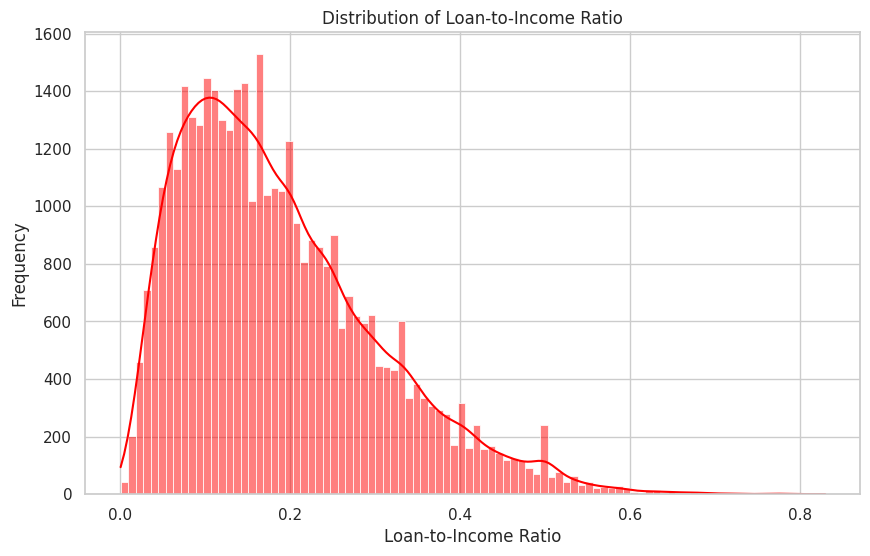

In [11]:
# Step 6: Univariate Analysis of Derived Metrics
# Analyze the distribution of Debt-to-Income Ratio
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['dti'], kde=True, color='purple')
plt.title('Distribution of Debt-to-Income Ratio')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.show()

# Before plotting, we need to handle potential infinite or NaN values that may occur due to division by zero
loan_data_cleaned['credit_utilization'] = loan_data_cleaned['credit_utilization'].replace([float('inf'), -float('inf')], pd.NA)
loan_data_cleaned['credit_utilization'].fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['credit_utilization'], kde=True, color='orange')
plt.title('Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()

# Analyze the distribution of Loan-to-Income Ratio
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['loan_to_income'], kde=True, color='red')
plt.title('Distribution of Loan-to-Income Ratio')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

# Markdown: ## Univariate Analysis of Derived Metrics
# **DTI**: The Debt-to-Income Ratio is skewed, with most borrowers having a lower DTI, indicating they are not over-leveraged.
# **Credit Utilization Ratio**: The Credit Utilization Ratio varies widely, suggesting different levels of credit use among borrowers.
# **Loan-to-Income Ratio**: This ratio is mostly low, but some borrowers have taken loans that are significant relative to their income.
# Understanding these distributions helps in assessing the financial stability of the borrowers.


<ipython-input-7-0b30bde835ba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='dti', data=loan_data_cleaned, palette='Set3')


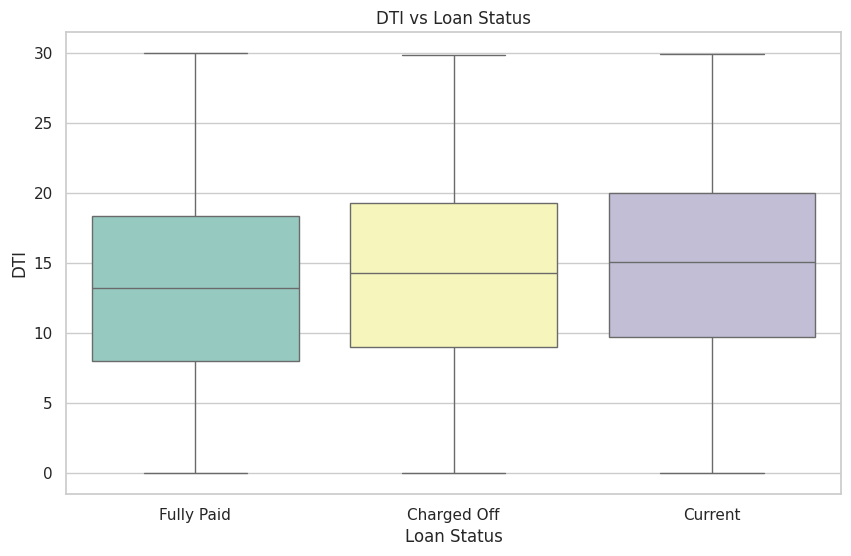

<ipython-input-7-0b30bde835ba>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='credit_utilization', data=loan_data_cleaned, palette='Set3')


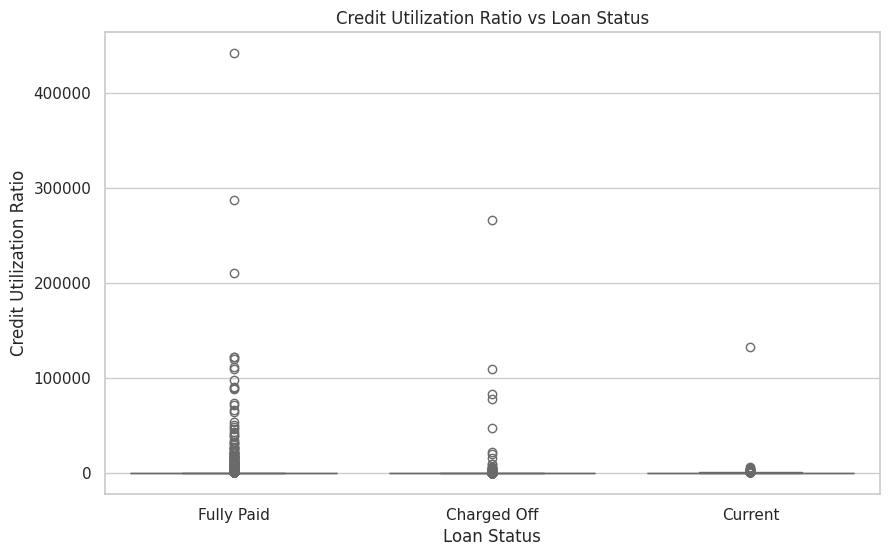

<ipython-input-7-0b30bde835ba>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_to_income', data=loan_data_cleaned, palette='Set3')


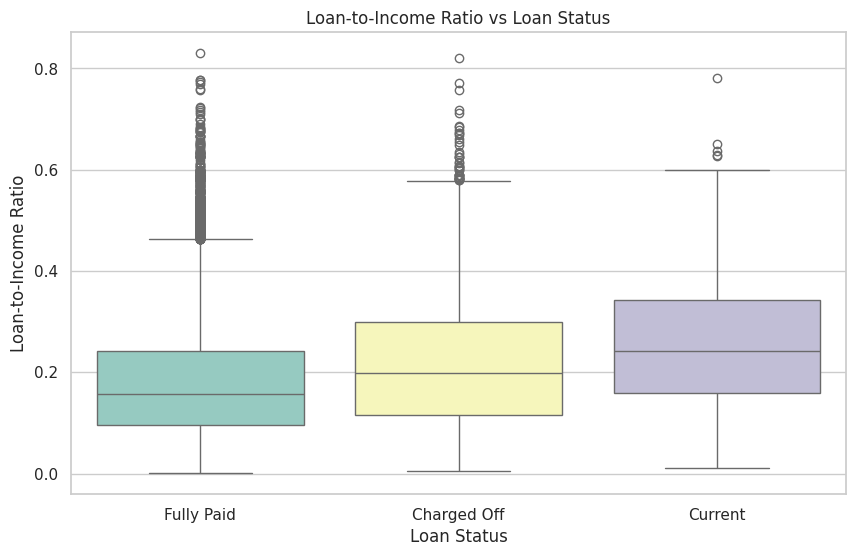

In [7]:
# Step 7: Bivariate Analysis of Derived Metrics
# Analyze the relationship between DTI and Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=loan_data_cleaned, palette='Set3')
plt.title('DTI vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('DTI')
plt.show()

# Analyze the relationship between Credit Utilization Ratio and Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='credit_utilization', data=loan_data_cleaned, palette='Set3')
plt.title('Credit Utilization Ratio vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Utilization Ratio')
plt.show()

# Analyze the relationship between Loan-to-Income Ratio and Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_to_income', data=loan_data_cleaned, palette='Set3')
plt.title('Loan-to-Income Ratio vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan-to-Income Ratio')
plt.show()

# Markdown: ## Bivariate Analysis of Derived Metrics
# **DTI vs Loan Status**: Borrowers with higher Debt-to-Income Ratios are more likely to default, as indicated by the charged-off loans.
# **Credit Utilization vs Loan Status**: Higher credit utilization correlates with an increased likelihood of default, suggesting that over-leveraged borrowers are at higher risk.
# **Loan-to-Income Ratio vs Loan Status**: Loans that represent a significant portion of the borrower's income are more likely to be charged off, indicating that such borrowers might struggle with repayments.
# These derived metrics provide critical insights into the financial behaviors that may contribute to loan defaults.


<ipython-input-8-f0697ab06582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='dti', data=loan_data_cleaned, palette='Set2')


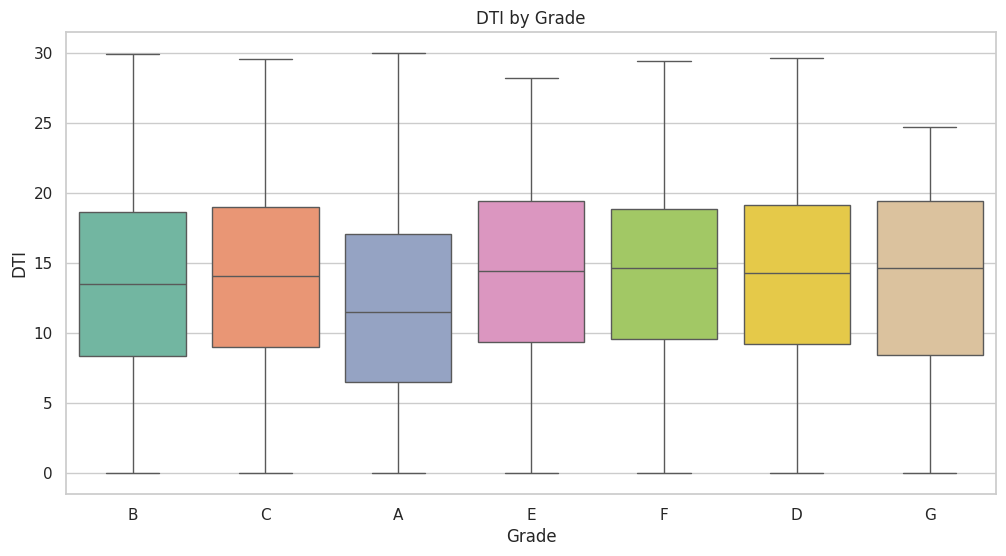

<ipython-input-8-f0697ab06582>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sub_grade', y='loan_to_income', data=loan_data_cleaned, palette='Set3')


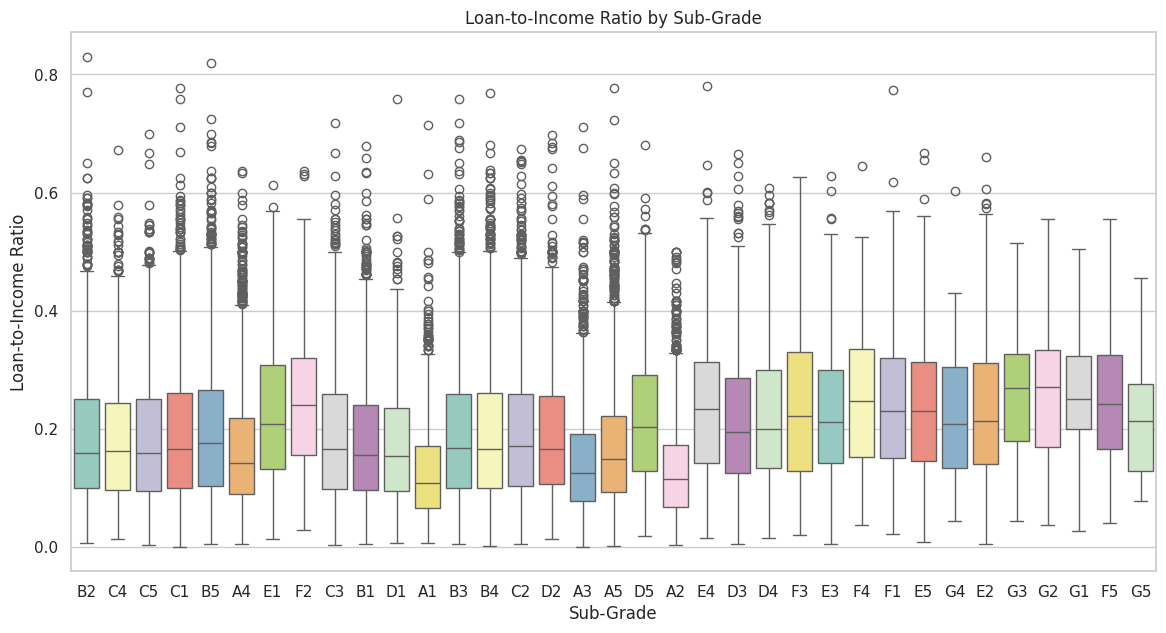

<ipython-input-8-f0697ab06582>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='credit_utilization', data=loan_data_cleaned, palette='Set2')


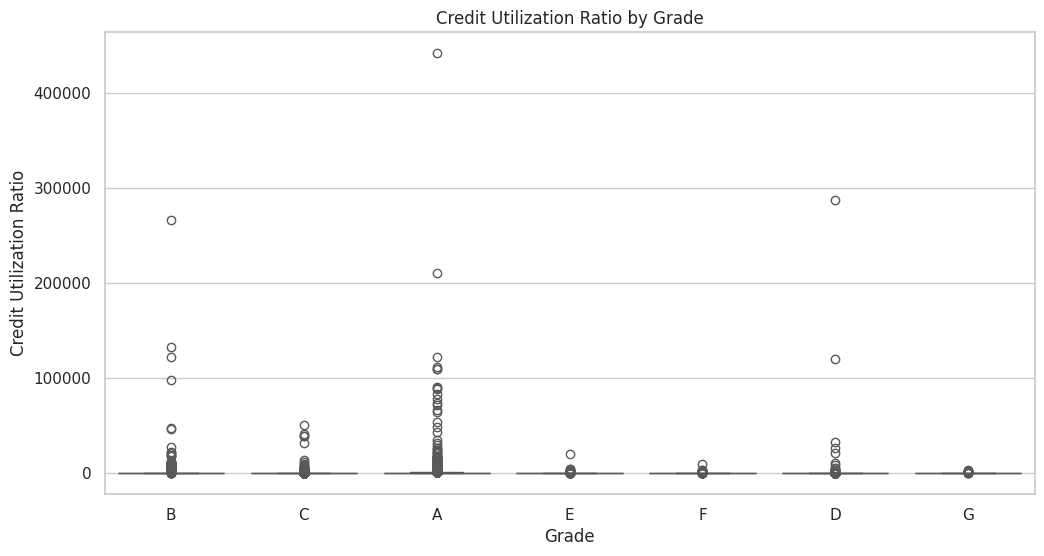

In [8]:
# Step 8: Segmented Analysis of Derived Metrics
# Segment the data by Grade and analyze DTI
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='dti', data=loan_data_cleaned, palette='Set2')
plt.title('DTI by Grade')
plt.xlabel('Grade')
plt.ylabel('DTI')
plt.show()

# Segment the data by Sub-Grade and analyze Loan-to-Income Ratio
plt.figure(figsize=(14, 7))
sns.boxplot(x='sub_grade', y='loan_to_income', data=loan_data_cleaned, palette='Set3')
plt.title('Loan-to-Income Ratio by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Loan-to-Income Ratio')
plt.show()

# Segment the data by Grade and analyze Credit Utilization Ratio
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='credit_utilization', data=loan_data_cleaned, palette='Set2')
plt.title('Credit Utilization Ratio by Grade')
plt.xlabel('Grade')
plt.ylabel('Credit Utilization Ratio')
plt.show()

# Markdown: ## Segmented Analysis of Derived Metrics
# **DTI by Grade**: Higher loan grades (A, B) generally have lower Debt-to-Income Ratios, indicating that higher-grade borrowers are less over-leveraged.
# **Loan-to-Income Ratio by Sub-Grade**: Within each grade, sub-grades with lower risk (e.g., A1, B1) tend to have lower loan-to-income ratios, indicating more conservative borrowing.
# **Credit Utilization by Grade**: Higher-grade borrowers tend to have lower credit utilization ratios, suggesting better credit management.
# Segmenting by grade and sub-grade reveals that borrowers with better credit profiles (higher grades) tend to manage their finances more conservatively, which correlates with lower default rates.

# Markdown: ## Final Conclusions
# 1. **Loan Amount and Interest Rate**: Higher loan amounts and interest rates are associated with an increased risk of loan defaults. These factors should be carefully considered when approving loans.
# 2. **Derived Metrics**: Metrics like Debt-to-Income Ratio, Credit Utilization Ratio, and Loan-to-Income Ratio provide deeper insights into the financial health of borrowers. High values in these metrics are strong indicators of potential default risk.
# 3. **Segmented Analysis**: Borrowers with higher credit grades (A, B) generally manage their debts better, with lower DTI, credit utilization, and loan-to-income ratios. These segments are less likely to default compared to lower-grade borrowers.
# 4. **Risk Management**: The company should use these insights to refine its lending criteria, focusing on borrowers with lower derived metric values and higher grades to minimize default risks.

# Markdown: ## Next Steps
# - **Implementation**: Use the derived metrics and segmented analysis results to build risk assessment models that incorporate these insights.
# - **Monitoring**: Continuously monitor these metrics for new loan applicants to ensure ongoing risk management and adjustment of lending strategies as needed.
# - **Further Analysis**: Explore additional derived metrics or machine learning models to predict loan defaults with higher accuracy.